In [1]:
install.packages("VancouvR")
install.packages("geojsonio")
install.packages("cancensus")
install.packages("sf")
install.packages("units")

Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'VancouvR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\Rtmpkfd4Jb\downloaded_packages


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'geojsonio' successfully unpacked and MD5 sums checked


ERROR: Error in unpackPkgZip(foundpkgs[okp, 2L], foundpkgs[okp, 1L], lib, libs_only, : ERROR: failed to lock directory 'C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4' for modifying
Try removing 'C:\Users\Kaiyan Zhang\AppData\Local\R\win-library\4.4/00LOCK'


In [6]:
library(geojsonio)
library(tidyverse)
library(dplyr)
library("knitr")
library(units)

Registered S3 method overwritten by 'geojsonsf':
  method        from   
  print.geojson geojson


Attaching package: 'geojsonio'


The following object is masked from 'package:base':

    pretty


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
udunits database from C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4/units/share/udunits/udunits2.xml



In [7]:

library(cancensus)
options(cancensus.api_key='CensusMapper_f228791d9506a7a747ece66db73b95be')
options(cancensus.cache_path = "/cache")

Census data is currently stored temporarily.

 In order to speed up performance, reduce API quota usage, and reduce unnecessary network calls, please set up a persistent cache directory via `set_cancensus_cache_path('<local cache path>', install = TRUE)`.
 This will add your cache directory as environment varianble to your .Renviron to be used across sessions and projects.





In [8]:
census_data <- get_census(dataset='CA16', regions=list(CSD="5915022"), vectors=c("v_CA16_401","v_CA16_404","v_CA16_406","v_CA16_1","v_CA16_2396","v_CA16_2510"), labels="detailed", geo_format="sf", level='DA')

Reading vectors data from local cache.

Reading geo data from local cache.



In [9]:
colnames(census_data)

[1] "Shape Area"                                                                                                                                    
 [2] "Type"                                                                                                                                          
 [3] "Households"                                                                                                                                    
 [4] "CD_UID"                                                                                                                                        
 [5] "Dwellings"                                                                                                                                     
 [6] "GeoUID"                                                                                                                                        
 [7] "Population"                                                                                                                                    
 [8] "CSD_UID"                                                                                                                                       
 [9] "CT_UID"                                                                                                                                        
[10] "CMA_UID"                                                                                                                                       
[11] "Region Name"                                                                                                                                   
[12] "Area (sq km)"                                                                                                                                  
[13] "v_CA16_401: Population, 2016"                                                                                                                  
[14] "v_CA16_404: Total private dwellings"                                                                                                           
[15] "v_CA16_406: Population density per square kilometre"                                                                                           
[16] "v_CA16_1: Age Stats"                                                                                                                           
[17] "v_CA16_2396: Total - Income statistics in 2015 for private households by household size - 100% data"                                           
[18] "v_CA16_2510: Total - Low-income status in 2015 for the population in private households to whom low-income concepts are applicable - 100% data"
[19] "geometry"

In [44]:
census_data_clean <- census_data|>
    rename(
        name = 'GeoUID',
        households = Households, 
        dwellings = Dwellings, 
        population = `v_CA16_401: Population, 2016` ,
        population_density = 'v_CA16_406: Population density per square kilometre', 
        region = `Region Name` , 
        area_sq_km = `Area (sq km)`, 
        age =  `v_CA16_1: Age Stats` , 
        income = `v_CA16_2396: Total - Income statistics in 2015 for private households by household size - 100% data`     
    )|>
    select(name, households, dwellings, population,population_density, region, area_sq_km, age, income)|>
    filter(region == "Vancouver")|>
    glimpse()

Rows: 993
Columns: 10
$ name               <chr> "59150307", "59150308", "59150309", "59150310", "59…
$ households         <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174, 2…
$ dwellings          <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189, 3…
$ population         <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 506, …
$ population_density <dbl> 2110.9, 4575.3, 6663.7, 4895.0, 6567.9, 6445.0, 629…
$ region             <fct> Vancouver, Vancouver, Vancouver, Vancouver, Vancouv…
$ area_sq_km         <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.0870…
$ age                <dbl> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 510, …
$ income             <dbl> 255, 205, 270, 280, 180, 205, 405, 170, 335, 175, 2…
$ geometry           <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MULTIP…


In [45]:

library("sf")

In [46]:
census_data_st <- st_sf(census_data_clean, geometry = census_data_clean$geometry, crs = 4326)
census_data_centroid <- st_centroid(census_data_clean)

In [13]:
library(VancouvR)
search_cov_datasets("property-tax") %>%
  select(dataset_id,title)

dataset_id,title
<chr>,<chr>
property-tax-report-2016-2019,Property tax report 2016-2019
property-tax-report-2011-2015,Property tax report 2011-2015
property-tax-report-2006-2010,Property tax report 2006-2010
property-tax-report,Property tax report


In [14]:
tax_data <- get_cov_data(dataset_id = "property-tax-report-2016-2019",
                         where="tax_assessment_year='2016'",
                         select = "current_land_value, land_coordinate as tax_coord")|>
    as.tibble()
glimpse(tax_data) # read in the data of land value, and changed it coordname to tax coord, so it matched the property polygon data

Warning message:
"`as.tibble()` was deprecated in tibble 2.0.0.
ℹ Please use `as_tibble()` instead.
ℹ The signature and semantics have changed, see `?as_tibble`."

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `current_land_value =
  .Primitive("as.integer")(current_land_value)`.
Caused by warning:
! NAs introduced by coercion to integer range"


Rows: 199,924
Columns: 2
$ current_land_value <int> 126000, 1100000, 1028000, 825000, 922000, 878000, 1…
$ tax_coord          <chr> "58825549", "60125529", "61223603", "63025324", "59…


In [15]:
colnames(tax_data)

[1] "current_land_value" "tax_coord"

In [16]:
url = "https://raw.githubusercontent.com/Irene-Berezin/econ326/refs/heads/main/crimedata_csv_AllNeighbourhoods_AllYears/crimedata_csv_AllNeighbourhoods_AllYears.csv"
intentional_crime_data <- read_csv(url)|>
    rename(type = TYPE, year = YEAR, neighbourhood = NEIGHBOURHOOD, x = X, y = Y)|>
    select(type, year, neighbourhood, x, y)|>
    filter(!type %in% c("Vehicle Collision or Pedestrian Struck (with Fatality)",
    "Vehicle Collision or Pedestrian Struck (with Injury)",
    "Mischief"))|>
    filter(year == 2016)|>
    filter(x!=0, y!=0)|>
    group_by(type)|>
    arrange(year)

glimpse(intentional_crime_data)


Rows: 895823 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 34,582
Columns: 5
Groups: type [6]
$ type          <chr> "Other Theft", "Other Theft", "Other Theft", "Other Thef…
$ year          <dbl> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 20…
$ neighbourhood <chr> "West End", "West End", "West End", "West End", "West En…
$ x             <dbl> 491004.8, 491004.8, 491007.8, 491007.8, 491007.8, 491007…
$ y             <dbl> 5459177, 5459177, 5459174, 5459174, 5459174, 5459174, 54…


In [17]:
intentional_crime_sf <- intentional_crime_data|>
    st_as_sf(coords = c("x", "y"), crs = 32610)|>
    st_transform(crs = 4326)|>
    glimpse()

Rows: 34,582
Columns: 4
Groups: type [6]
$ type          <chr> "Other Theft", "Other Theft", "Other Theft", "Other Thef…
$ year          <dbl> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 20…
$ neighbourhood <chr> "West End", "West End", "West End", "West End", "West En…
$ geometry      <POINT [°]> POINT (-123.1237 49.28528), POINT (-123.1237 49.28…


In [18]:
intentional_crime_count <- intentional_crime_data|>
    mutate(neighbourhood = if_else(neighbourhood == "Central Business District", "Downtown", neighbourhood))|>
    group_by(type)|>
    summarize(crime_count = n())|>
    glimpse()

colnames(intentional_crime_count)[colnames(intentional_crime_count) == "neighbourhood"] <- "name"

Rows: 6
Columns: 2
$ type        <chr> "Break and Enter Commercial", "Break and Enter Residential…
$ crime_count <int> 2683, 2989, 11981, 12814, 2637, 1478


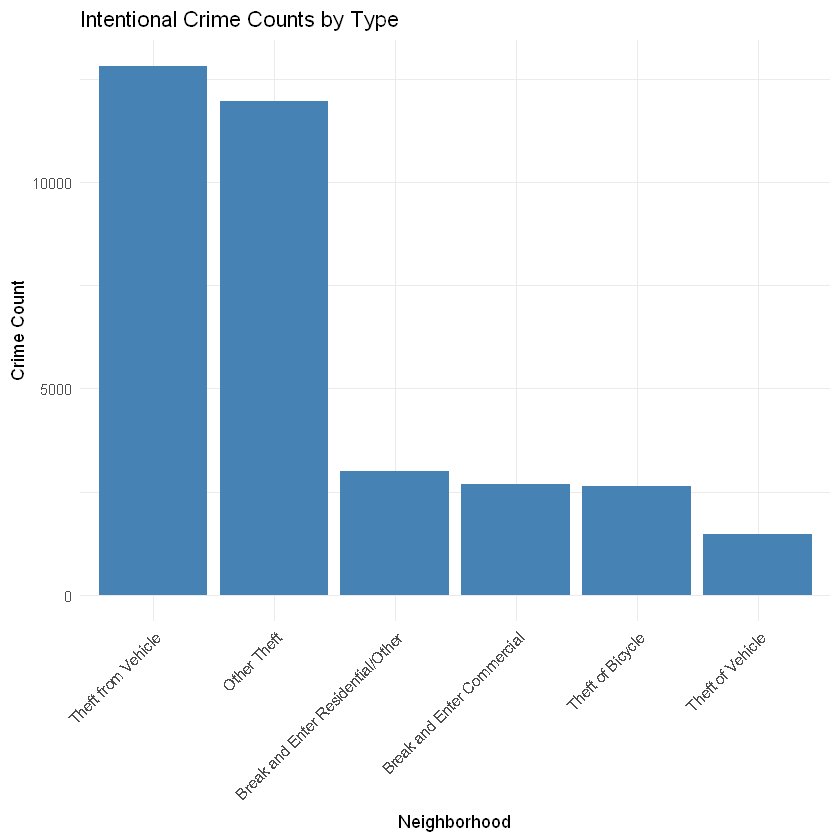

In [19]:
ggplot(intentional_crime_count, aes(x = reorder(type, -crime_count), y = crime_count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Intentional Crime Counts by Type",
       x = "Neighborhood",
       y = "Crime Count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [20]:
local_area_boundary <- get_cov_data(dataset_id ="local-area-boundary")|>
    glimpse()

Rows: 22
Columns: 4
$ name         <chr> "Downtown", "Hastings-Sunrise", "Kerrisdale", "Marpole", …
$ geom         <chr> "{\"coordinates\": [[[-123.11226654052733, 49.29016494657…
$ geo_point_2d <chr> "49.28074707013743, -123.11656700827415", "49.27793405209…
$ geometry     <POLYGON [°]> POLYGON ((-123.1123 49.2901..., POLYGON ((-123.05…


In [21]:
local_area_boundary_centroid <- local_area_boundary|>
    mutate(geometry = st_centroid(geometry))|>
    select(geometry)


st_sf(local_area_boundary_centroid, geometry = local_area_boundary_centroid$geometry, crs = 4326)


,geometry
,<POINT [°]>
1,POINT (-123.1166 49.28075)
2,POINT (-123.0403 49.27793)
3,POINT (-123.1596 49.22366)
4,POINT (-123.1284 49.21021)
5,POINT (-123.123 49.2264)
6,POINT (-123.1031 49.24477)
7,POINT (-123.1218 49.24556)
8,POINT (-123.1398 49.24568)
9,POINT (-123.0641 49.22001)


In [22]:
local_area_boundary_sf <- st_sf(local_area_boundary, geometry = local_area_boundary$geometry, crs = 4326)|>
    glimpse()

Rows: 22
Columns: 4
$ name         <chr> "Downtown", "Hastings-Sunrise", "Kerrisdale", "Marpole", …
$ geom         <chr> "{\"coordinates\": [[[-123.11226654052733, 49.29016494657…
$ geo_point_2d <chr> "49.28074707013743, -123.11656700827415", "49.27793405209…
$ geometry     <POLYGON [°]> POLYGON ((-123.1123 49.2901..., POLYGON ((-123.05…


In [23]:
property_polygons <- get_cov_data(dataset_id="property-parcel-polygons")

In [24]:
glimpse(property_polygons)

Rows: 99,939
Columns: 7
$ civic_number <chr> "7057", "1545", "1546", "6995", "1875", "1861", "1841", "…
$ streetname   <chr> "FLEMING ST", "E 55TH AV", "E 54TH AV", "BALMORAL ST", "E…
$ tax_coord    <chr> "23680527", "80623385", "80423366", "24479993", "80524475…
$ site_id      <chr> "008762597", "009944427", "003432785", "009468587", "0119…
$ geom         <chr> "{\"coordinates\": [[[-123.0740830604616, 49.219974944207…
$ geo_point_2d <chr> "49.219908147934284, -123.07382021053868", "49.2197654966…
$ geometry     <POLYGON [°]> POLYGON ((-123.0741 49.2199..., POLYGON ((-123.07…


In [25]:
land_price <- merge(tax_data, property_polygons, by = "tax_coord")|>
    glimpse() 


# Merge two datasets so we have land price and their geometry information in one single dataframe

Rows: 204,278
Columns: 8
$ tax_coord          <chr> "01963206", "01963229", "01963245", "01963265", "01…
$ current_land_value <int> 11366000, 10623000, 10763000, 10763000, 12864000, 1…
$ civic_number       <chr> "4888", "4898", "4874", "4850", "4811", "4818", "16…
$ streetname         <chr> "BELMONT AV", "FANNIN AV", "FANNIN AV", "FANNIN AV"…
$ site_id            <chr> "010862706", "010863915", "010863923", "010863931",…
$ geom               <chr> "{\"coordinates\": [[[-123.22221178283283, 49.27466…
$ geo_point_2d       <chr> "49.27488185499064, -123.22286857659084", "49.27431…
$ geometry           <POLYGON [°]> POLYGON ((-123.2222 49.2746..., POLYGON ((-…


In [26]:

land_price_sf <- st_sf(land_price, geometry = land_price$geometry, crs = 4326)


In [27]:
glimpse(land_price_sf)

Rows: 204,278
Columns: 8
$ tax_coord          <chr> "01963206", "01963229", "01963245", "01963265", "01…
$ current_land_value <int> 11366000, 10623000, 10763000, 10763000, 12864000, 1…
$ civic_number       <chr> "4888", "4898", "4874", "4850", "4811", "4818", "16…
$ streetname         <chr> "BELMONT AV", "FANNIN AV", "FANNIN AV", "FANNIN AV"…
$ site_id            <chr> "010862706", "010863915", "010863923", "010863931",…
$ geom               <chr> "{\"coordinates\": [[[-123.22221178283283, 49.27466…
$ geo_point_2d       <chr> "49.27488185499064, -123.22286857659084", "49.27431…
$ geometry           <POLYGON [°]> POLYGON ((-123.2222 49.2746..., POLYGON ((-…


In [28]:

install.packages("ggmap")
library(ggmap)


Installing package into 'C:/Users/Kaiyan Zhang/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Kaiyan Zhang\AppData\Local\Temp\Rtmpkfd4Jb\downloaded_packages


ℹ Google's Terms of Service: <https://mapsplatform.google.com>
  Stadia Maps' Terms of Service: <https://stadiamaps.com/terms-of-service/>
  OpenStreetMap's Tile Usage Policy: <https://operations.osmfoundation.org/policies/tiles/>
ℹ Please cite ggmap if you use it! Use `citation("ggmap")` for details.


In [29]:
key = '953a00a4-1c69-45b1-a0e4-b3492abdf92b'

In [30]:
register_stadiamaps(key, write = FALSE)

ℹ © Stadia Maps © Stamen Design © OpenMapTiles © OpenStreetMap contributors.



ℹ 42 tiles needed, this may take a while (try a smaller zoom?)



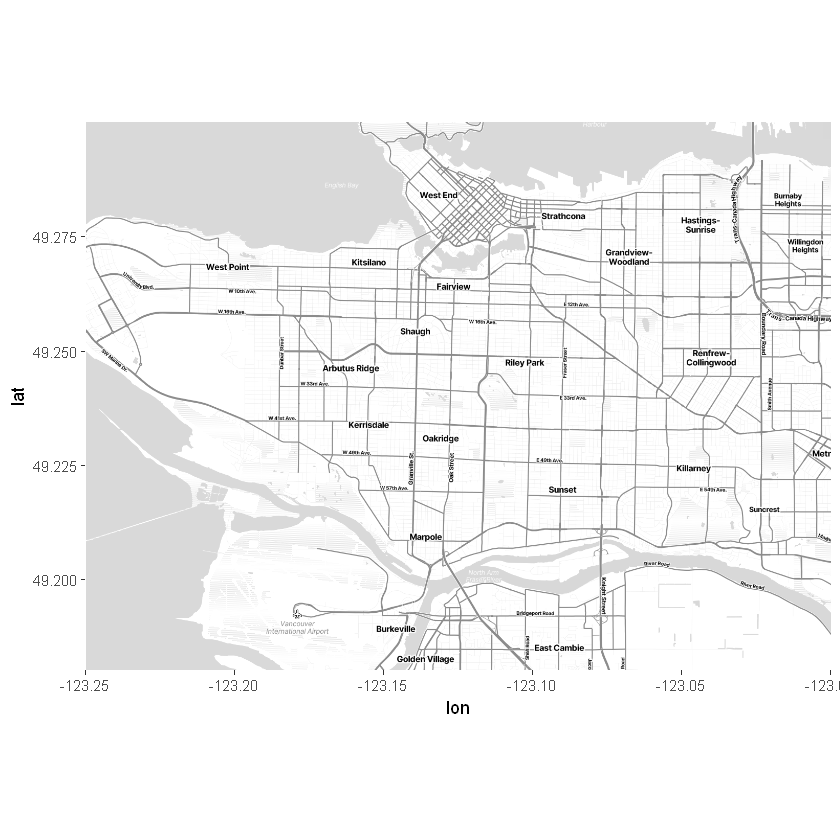

In [31]:
bbox <- c(left = -123.25, bottom = 49.18, right = -123.0, top = 49.3)

map <- get_stadiamap(bbox = bbox, zoom = 13, maptype = "stamen_toner_lite", filetype = "svg")
ggmap(map)

In [32]:
land_price_adjusted <- land_price_sf|>
mutate(current_land_value = current_land_value/1000000)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)


ggmap(map) +
  geom_sf(data = land_price_adjusted, aes(fill = current_land_value, alpha = 0.6), inherit.aes = FALSE, color = NA) +
  scale_fill_viridis_c(option = "plasma", name = "Land Value") +
  theme_minimal() +
  labs(title = "Property Land Values", subtitle = "Colored by Current Land Value")

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


In [33]:
school_data <- get_cov_data(dataset_id = "schools")|>
    as.tibble()
glimpse(school_data)

Rows: 194
Columns: 7
$ address         <chr> "4195 Alexandra St", "3663 Penticton St", "3455 W King…
$ school_category <chr> "Independent School", "Public School", "Public School"…
$ school_name     <chr> "Little Flower Academy", "Lord Beaconsfield Elementary…
$ geom            <chr> "{\"coordinates\": [-123.14226149913934, 49.2484313418…
$ geo_local_area  <chr> "Shaughnessy", "Renfrew-Collingwood", "Dunbar-Southlan…
$ geo_point_2d    <chr> "49.24843134181949, -123.14226149913934", "49.25213837…
$ geometry        <POINT [°]> POINT (-123.1423 49.24843), POINT (-123.0527 49.…


In [34]:
school_data_st <- st_sf(school_data, geometry = school_data$geometry, crs = 4326)

In [ ]:
ggmap(map) +
  geom_sf(data = land_price_adjusted, aes(fill = current_land_value),  alpha = 0.6, inherit.aes = FALSE, color = NA) +
  scale_fill_viridis_c(option = "plasma", name = "Land Value") +
  geom_sf(data = school_data$geometry, color = "#ff0000", size = 2, inherit.aes = FALSE) +
  theme_minimal() +
  labs(title = "Property Land Values", subtitle = "Colored by Current Land Value")

ERROR: Error in ggmap(map): could not find function "ggmap"


In [ ]:
land_price_centroid <- land_price|>
mutate(geometry = st_centroid(geometry))|>
select(geometry)


st_sf(land_price_centroid, geometry = land_price_centroid$geometry, crs = 4326)




ERROR: Error in eval(expr, envir, enclos): object 'land_price' not found


In [ ]:
glimpse(land_price_centroid)


ERROR: Error in eval(expr, envir, enclos): object 'land_price_centroid' not found


In [ ]:
ggmap(map) +
  geom_sf(data = land_price_adjusted, aes(fill = current_land_value),  alpha = 0.6, inherit.aes = FALSE, color = NA) +
  scale_fill_viridis_c(option = "plasma", name = "Land Value") +
  geom_sf(data = land_price_centroid$geometry, color = "#ff0000", size = 0.5, inherit.aes = FALSE) +
  theme_minimal() +
  labs(title = "Property Land Values", subtitle = "Colored by Current Land Value")

ERROR: Error in ggmap(map): could not find function "ggmap"


In [ ]:
closeness_metric <- function(c, s, alpha) {
"
Given two datasets of point geometries, creates a new dataframe 
of the weighted closeness index of each element of list one relative to all elements of list 2.
"
  closeness_values <- numeric(length(c))
  for (i in seq_along(c)) {
    distances <- as.numeric(st_distance(s, c[i]))
    decayed_influences <- exp(-alpha * distances)
    closeness_values[i] <- sum(decayed_influences)
  }
  return(data.frame(land_price_id = seq_along(c), closeness = closeness_values))
}


In [ ]:
closeness_values <- closeness_metric(land_price_centroid$geometry, school_data$geometry, 0.001)

ERROR: Error in eval(expr, envir, enclos): object 'land_price_centroid' not found


In [ ]:
closeness_values <- pull(as.tibble(closeness_values))

land_price_sf$closeness_value <- closeness_values 


In [ ]:
glimpse(land_price_sf)

max(land_price_sf$closeness_value)
test <- land_price_sf|>
filter(closeness_value > 299)

test

Rows: 204,278
Columns: 9
$ tax_coord          <chr> "01963206", "01963229", "01963245", "01963265", "01…
$ current_land_value <int> 11366000, 10623000, 10763000, 10763000, 12864000, 1…
$ civic_number       <chr> "4888", "4898", "4874", "4850", "4811", "4818", "16…
$ streetname         <chr> "BELMONT AV", "FANNIN AV", "FANNIN AV", "FANNIN AV"…
$ site_id            <chr> "010862706", "010863915", "010863923", "010863931",…
$ geom               <chr> "{\"coordinates\": [[[-123.22221178283283, 49.27466…
$ geo_point_2d       <chr> "49.27488185499064, -123.22286857659084", "49.27431…
$ geometry           <POLYGON [°]> POLYGON ((-123.2222 49.2746..., POLYGON ((-…
$ closeness_value    <dbl> 1.387210, 1.310526, 1.374908, 1.432028, 1.619398, 1…


[1] 14.11312

tax_coord,current_land_value,civic_number,streetname,site_id,geom,geo_point_2d,geometry,closeness_value
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<GEOMETRY [°]>,<dbl>


In [ ]:
test

tax_coord,current_land_value,civic_number,streetname,site_id,geom,geo_point_2d,geometry,closeness_value
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<GEOMETRY [°]>,<dbl>


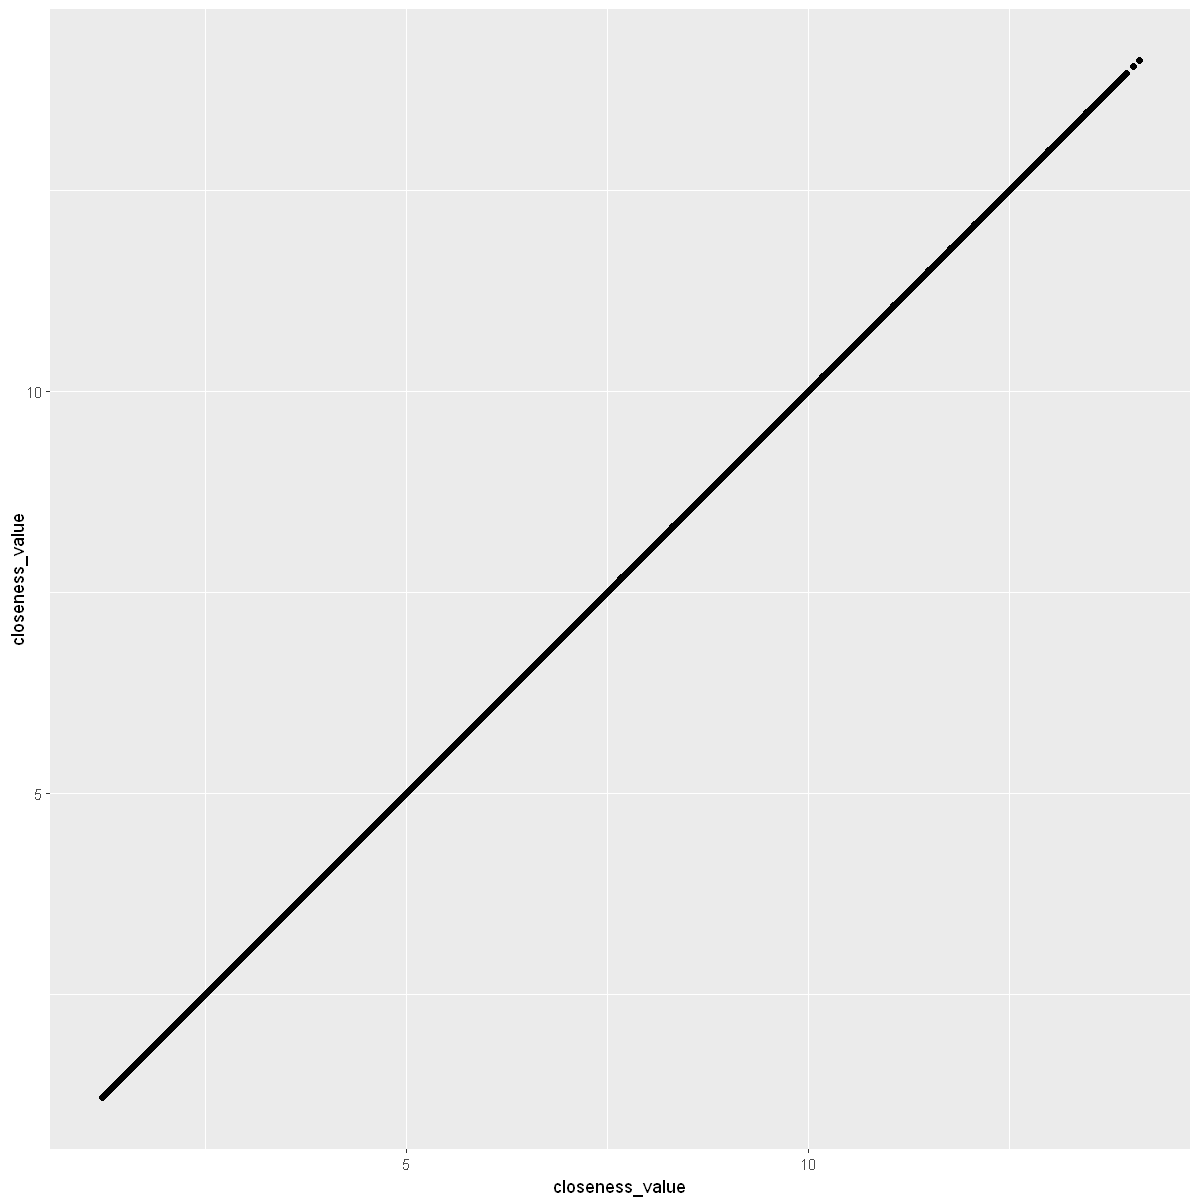

In [ ]:
plot <- land_price_sf|>
ggplot(aes(x=closeness_value, y=closeness_value))+geom_point()

plot

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


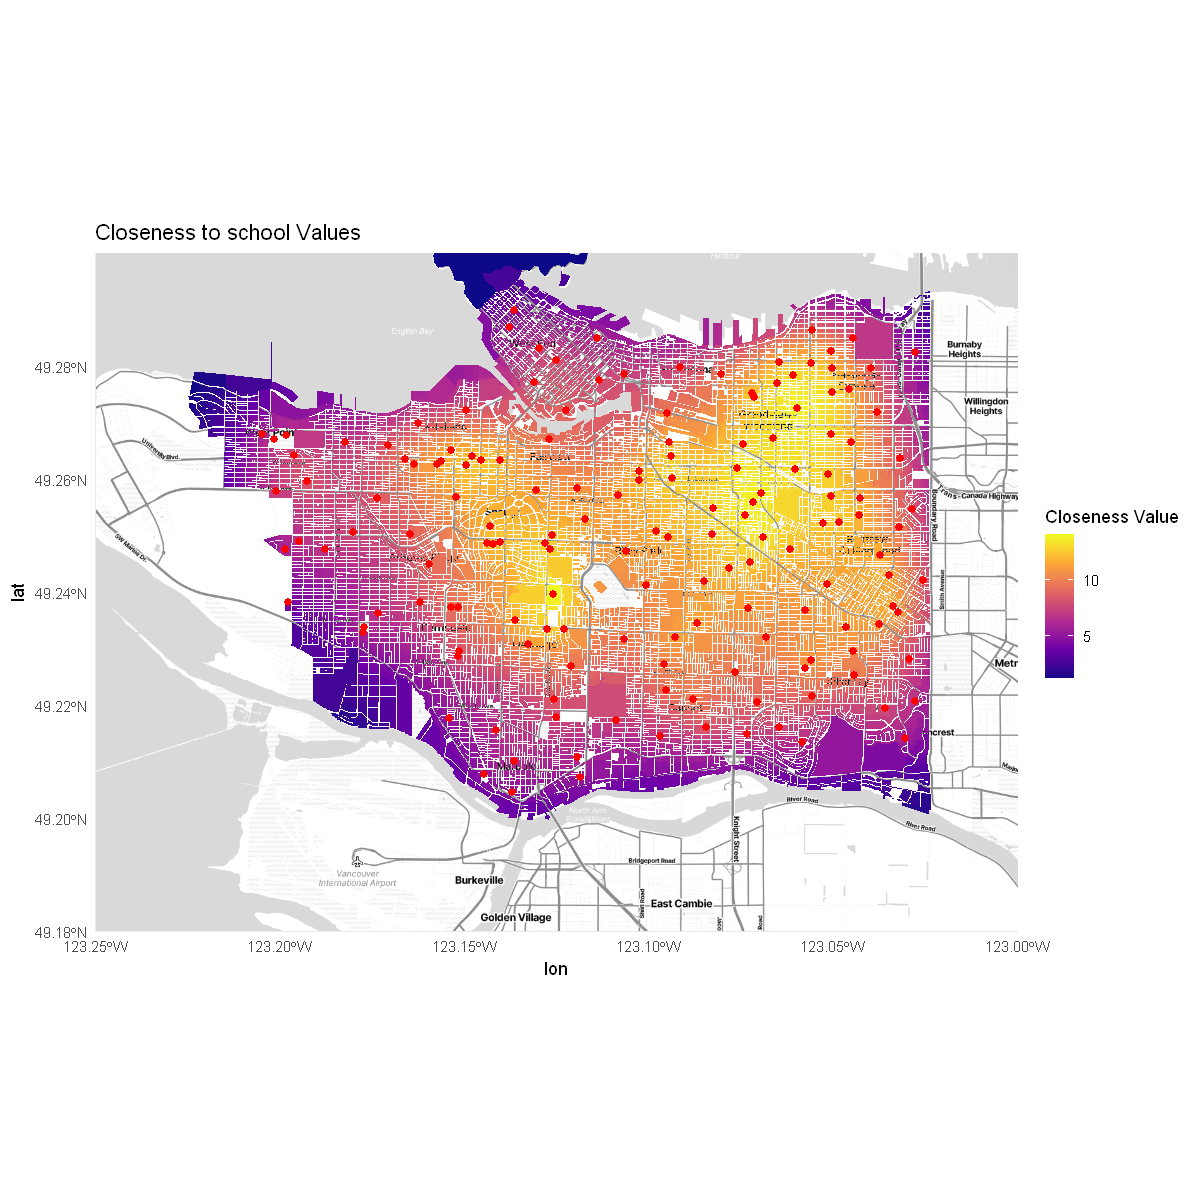

In [ ]:
ggmap(map) +
  geom_sf(data = land_price_sf, aes(fill = closeness_values), inherit.aes = FALSE, color = NA) +
  scale_fill_viridis_c(option = "plasma", name = "Closeness Value") +
  geom_sf(data = school_data$geometry, color = "#ff0000", size = 2, inherit.aes = FALSE) +
  theme_minimal() +
  labs(title = "Closeness to school Values")

In [ ]:
light_data <- get_cov_data(dataset_id = 'street-lighting-poles')|>
    as.tibble()
glimpse(light_data)

Rows: 57,708
Columns: 6
$ block_number   <chr> "59", "23", "63", "13", "40", "86", "55", "12", "49", "…
$ node_number    <dbl> 1, 4, 2, 3, 4, 4, 3, 1, 7, 1, 4, 1, 2, 3, 1, 2, 2, 9, 3…
$ geom           <chr> "{\"coordinates\": [-123.08688645683188, 49.23384357188…
$ geo_local_area <chr> "Kensington-Cedar Cottage", "Arbutus Ridge", "Kensingto…
$ geo_point_2d   <chr> "49.23384357188207, -123.08688645683188", "49.255368339…
$ geometry       <POINT [°]> POINT (-123.0869 49.23384), POINT (-123.1596 49.2…


In [ ]:
closeness_values <- closeness_metric(local_area_boundary_centroid$geometry, light_data$geometry, 0.001)|>
    glimpse()

Rows: 22
Columns: 2
$ land_price_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ closeness     <dbl> 2443.471, 2857.987, 3418.503, 1769.030, 2470.933, 3148.4…


In [ ]:
local_school_closeness_values <- closeness_metric(local_area_boundary_centroid$geometry, school_data$geometry, 0.001)|>
    glimpse()

Rows: 22
Columns: 2
$ land_price_id <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1…
$ closeness     <dbl> 8.987104, 12.927986, 12.847694, 6.950690, 9.165381, 8.54…


In [ ]:
local_school_closeness_values <- pull(as.tibble(local_school_closeness_values))
local_area_boundary_sf$closeness_values <- local_school_closeness_values

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


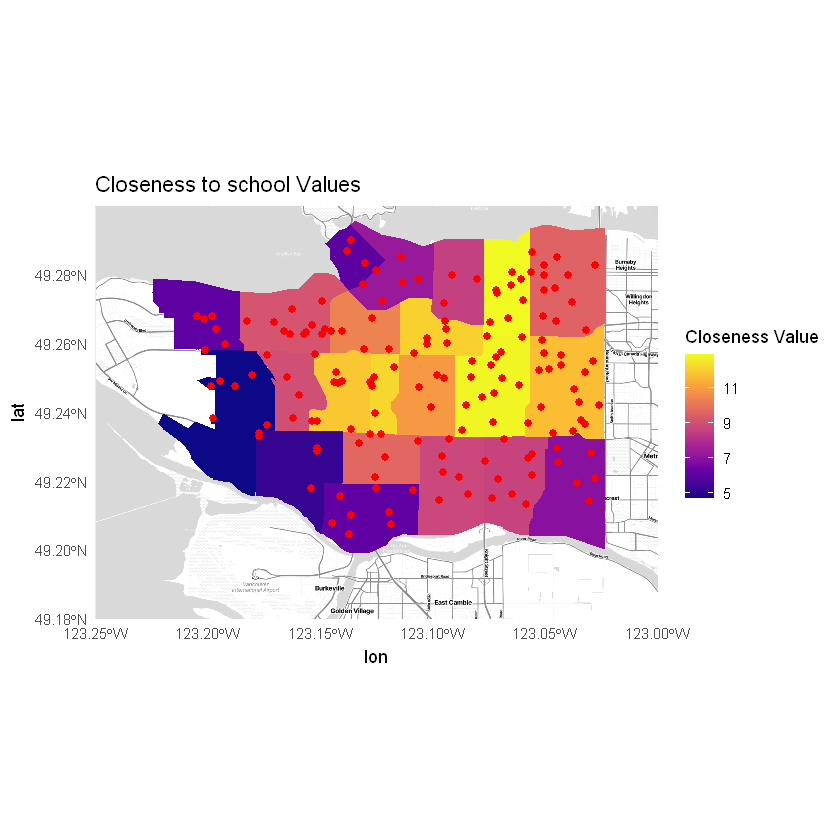

In [ ]:
ggmap(map) +
  geom_sf(data = local_area_boundary_sf, aes(fill = closeness_values), inherit.aes = FALSE, color = NA) +
  scale_fill_viridis_c(option = "plasma", name = "Closeness Value") +
  geom_sf(data = school_data$geometry, color = "#ff0000", size = 2, inherit.aes = FALSE) +
  theme_minimal() +
  labs(title = "Closeness to school Values")

In [ ]:

local_area_boundary_sf <- merge(local_area_boundary_sf, intentional_crime_count, by = "name")|>
    glimpse()

Rows: 22
Columns: 5
$ name         <chr> "Arbutus Ridge", "Downtown", "Dunbar-Southlands", "Fairvi…
$ geom         <chr> "{\"coordinates\": [[[-123.15259552001952, 49.25722503568…
$ geo_point_2d <chr> "49.24680490982789, -123.16166923820482", "49.28074707013…
$ crime_count  <int> 414, 11705, 391, 2140, 2021, 1111, 1580, 461, 505, 1793, …
$ geometry     <POLYGON [°]> POLYGON ((-123.1526 49.2572..., POLYGON ((-123.11…


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


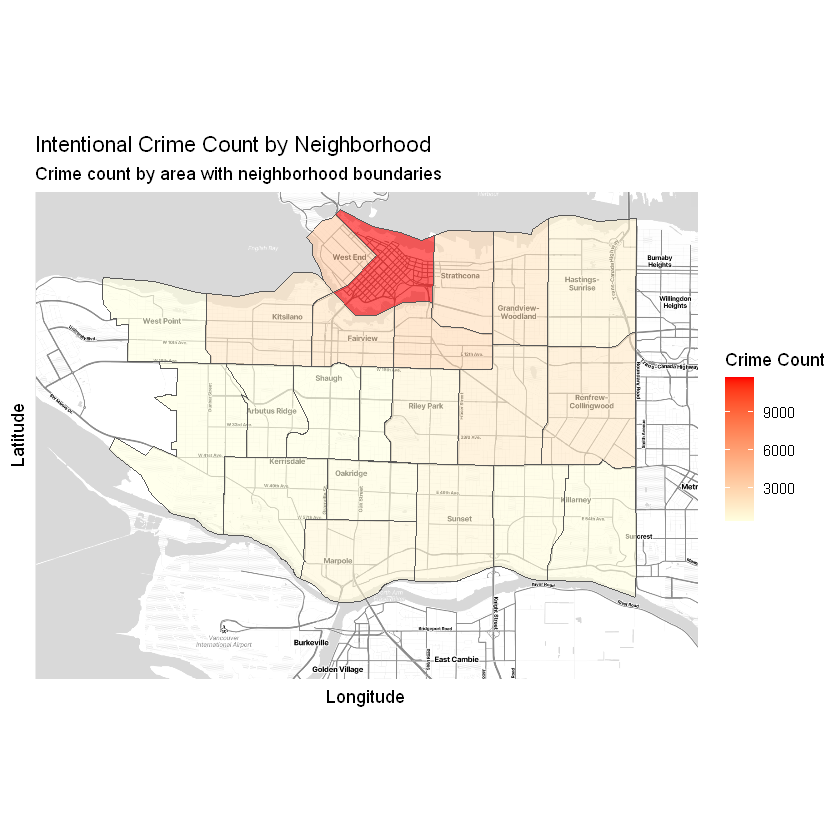

In [ ]:
ggmap(map) +
  geom_sf(data = local_area_boundary_sf, aes(fill = crime_count), inherit.aes = FALSE, alpha = 0.6) +
  scale_fill_gradient(low = "lightyellow", high = "red", name = "Crime Count") +
  labs(title = "Intentional Crime Count by Neighborhood",
       subtitle = "Crime count by area with neighborhood boundaries",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank())

In [ ]:
population_data <- data.frame(
  name = c(
    "Arbutus Ridge",
    "Downtown",
    "Dunbar-Southlands",
    "Fairview",
    "Grandview-Woodland",
    "Hastings-Sunrise",
    "Kensington-Cedar Cottage",
    "Kerrisdale",
    "Killarney",
    "Kitsilano",
    "Marpole",
    "Mount Pleasant",
    "Oakridge",
    "Renfrew-Collingwood",
    "Riley Park",
    "Shaughnessy",
    "South Cambie",
    "Strathcona",
    "Sunset",
    "Victoria-Fraserview",
    "West End",
    "West Point Grey"
  ),
  population = c(
    15295,
    62030,
    21425,
    33620,
    29175,
    34575,
    49325,
    13975,
    29325,
    43045,
    24460,
    32955,
    13030,
    51530,
    22555,
    8430,
    7970,
    12585,
    36500,
    31065,
    47200,
    13065
  )
)|>
glimpse()

Rows: 22
Columns: 2
$ name       <chr> "Arbutus Ridge", "Downtown", "Dunbar-Southlands", "Fairview…
$ population <dbl> 15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 293…


In [ ]:
local_area_boundary_sf <- merge(local_area_boundary_sf, population_data, by = "name")|>
    glimpse()



Rows: 22
Columns: 6
$ name         <chr> "Arbutus Ridge", "Downtown", "Dunbar-Southlands", "Fairvi…
$ geom         <chr> "{\"coordinates\": [[[-123.15259552001952, 49.25722503568…
$ geo_point_2d <chr> "49.24680490982789, -123.16166923820482", "49.28074707013…
$ crime_count  <int> 414, 11705, 391, 2140, 2021, 1111, 1580, 461, 505, 1793, …
$ population   <dbl> 15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 2…
$ geometry     <POLYGON [°]> POLYGON ((-123.1526 49.2572..., POLYGON ((-123.11…


In [ ]:
census_crime_rate <- local_area_boundary_sf |>
    mutate(
        count = as.numeric(`crime_count`),           # Use backticks if necessary
        population = as.numeric(`population`), # Use backticks if necessary
        crime_rate = (crime_count / population) * 100000
    ) |>
    glimpse()

Rows: 22
Columns: 8
$ name         <chr> "Arbutus Ridge", "Downtown", "Dunbar-Southlands", "Fairvi…
$ geom         <chr> "{\"coordinates\": [[[-123.15259552001952, 49.25722503568…
$ geo_point_2d <chr> "49.24680490982789, -123.16166923820482", "49.28074707013…
$ crime_count  <int> 414, 11705, 391, 2140, 2021, 1111, 1580, 461, 505, 1793, …
$ population   <dbl> 15295, 62030, 21425, 33620, 29175, 34575, 49325, 13975, 2…
$ geometry     <POLYGON [°]> POLYGON ((-123.1526 49.2572..., POLYGON ((-123.11…
$ count        <dbl> 414, 11705, 391, 2140, 2021, 1111, 1580, 461, 505, 1793, …
$ crime_rate   <dbl> 2706.767, 18869.902, 1824.971, 6365.259, 6927.164, 3213.3…


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


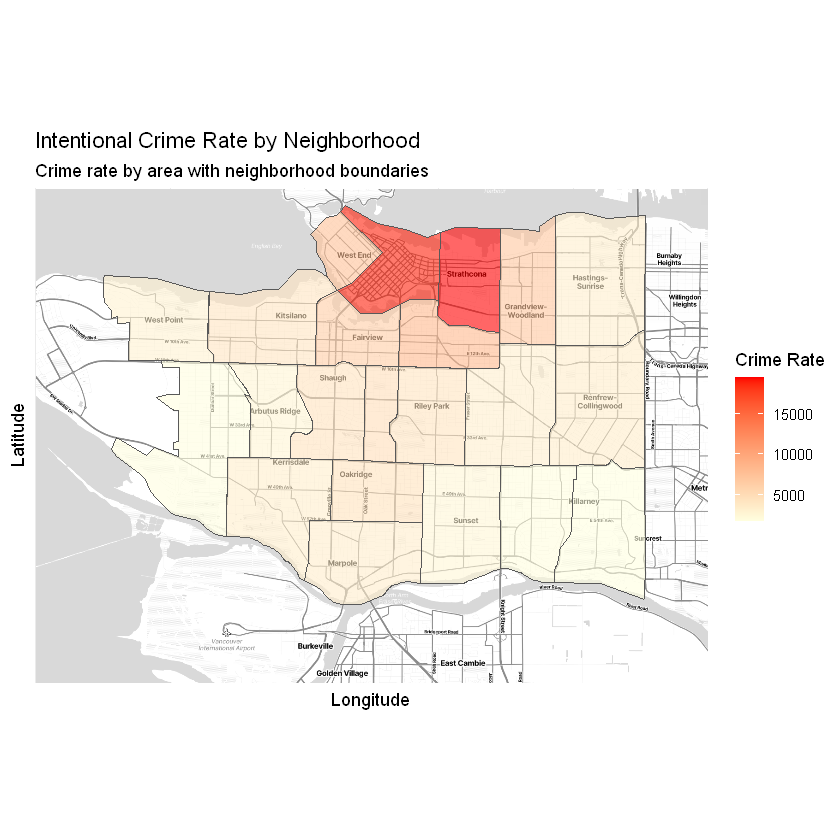

In [ ]:
ggmap(map) +
  geom_sf(data = census_crime_rate, aes(fill = crime_rate), inherit.aes = FALSE, alpha = 0.6) +
  scale_fill_gradient(low = "lightyellow", high = "red", name = "Crime Rate") +
  labs(title = "Intentional Crime Rate by Neighborhood",
       subtitle = "Crime rate by area with neighborhood boundaries",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank())

In [ ]:
average_crime_rate <- mean(census_crime_rate$crime_rate)

average_crime_rate

[1] 5435.953

In [35]:
compute_accessibility_index <- function(local_areas, points_of_interest) {
  local_areas <- st_transform(local_areas, crs = 4326)
  points_of_interest <- st_transform(points_of_interest, crs = 4326)
  
  # local_areas <- left_join(local_areas, population_data, by = "name")
  
  areas_union <- st_union(local_areas)
  points_of_interest <- st_intersection(points_of_interest, areas_union)
  
  area_centroids <- st_centroid(local_areas)
  
  # Calculate average distance from each local area to points of interest
  distance_matrix <- st_distance(area_centroids, points_of_interest)
  distance_matrix_km <- set_units(distance_matrix, "km")
  avg_distance_km <- apply(distance_matrix_km, 1, mean, na.rm = TRUE)
  local_areas$avg_distance_km <- avg_distance_km
  
  # Calculate points of interest density
  local_areas$area_km2 <- st_area(local_areas) %>% set_units("km^2") %>% set_units(NULL)

  points_in_areas <- st_join(points_of_interest, local_areas, join = st_within)
  poi_counts <- points_in_areas %>%
    st_set_geometry(NULL) %>%
    group_by_at("name") %>%
    summarise(poi_count = n())
  
  local_areas <- left_join(local_areas, poi_counts, by = "name")
  local_areas$poi_count[is.na(local_areas$poi_count)] <- 0

  local_areas$poi_density <- local_areas$poi_count / local_areas$area_km2
  
  # Calculate points per 10,000 population
  local_areas$poi_per_10k_pop <- (local_areas$poi_count / local_areas$population) * 10000
  
  # Normalize the values ([0, 1] range)
  normalize <- function(x) {
    return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
  }
  
  local_areas$avg_distance_norm <- normalize(avg_distance_km)
  local_areas$poi_density_norm <- normalize(local_areas$poi_density)
  local_areas$poi_per_10k_pop_norm <- normalize(local_areas$poi_per_10k_pop)
  
  local_areas$avg_distance_norm_inv <- 1 - local_areas$avg_distance_norm
  
  local_areas$accessibility_index <- 10*(local_areas$avg_distance_norm_inv +
                                      local_areas$poi_density_norm +
                                      local_areas$poi_per_10k_pop_norm) / 3
  
  
  return(local_areas)
}


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


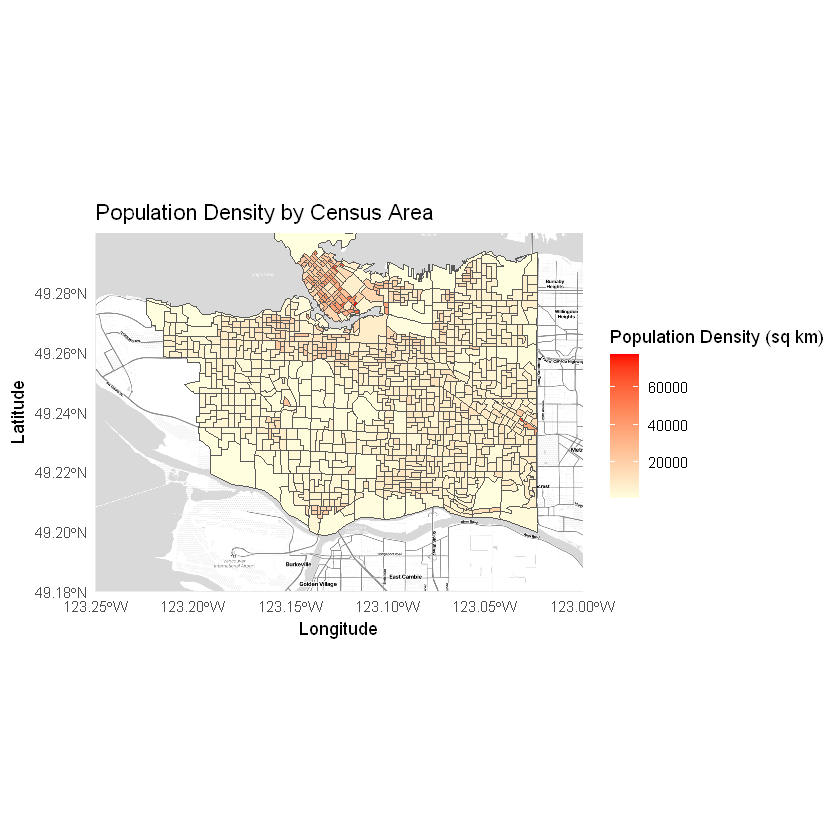

In [51]:
ggmap(map) +
  geom_sf(data = census_data_clean, aes(fill = population_density),inherit.aes = FALSE) +
  scale_fill_viridis_c() +
  scale_fill_gradient(low = "lightyellow", high = "red") +
  coord_sf(crs = st_crs(4326)) +
  theme_minimal() +
  labs(title = "Population Density by Census Area", fill = "Population Density (sq km)", x = "Longitude", y = "Latitude")

In [ ]:
census_population <- census_data_clean|>
    select(name, population)|>
    glimpse()
    

Rows: 993
Columns: 3
$ name       <chr> "59150307", "59150308", "59150309", "59150310", "59150311",…
$ population <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 506, 782, 683…
$ geometry   <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MULTIPOLYGON (…


In [36]:
school_census_with_index <- compute_accessibility_index(
  local_areas = census_data_st,
  points_of_interest = school_data_st
)|>
  glimpse()

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"
Warning message:
"st_centroid assumes attributes are constant over geometries"


Rows: 993
Columns: 19
$ name                  <chr> "59150307", "59150308", "59150309", "59150310", …
$ households            <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174…
$ dwellings             <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189…
$ population            <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 50…
$ region                <fct> Vancouver, Vancouver, Vancouver, Vancouver, Vanc…
$ area_sq_km            <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.0…
$ age                   <dbl> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 51…
$ income                <dbl> 255, 205, 270, 280, 180, 205, 405, 170, 335, 175…
$ avg_distance_km       <dbl> 7.535841, 7.253416, 6.976612, 7.089322, 6.790936…
$ area_km2              <dbl> 0.29829107, 0.10920474, 0.11154401, 0.10904415, …
$ poi_count             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ geometry              <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MUL…
$ poi_density     

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


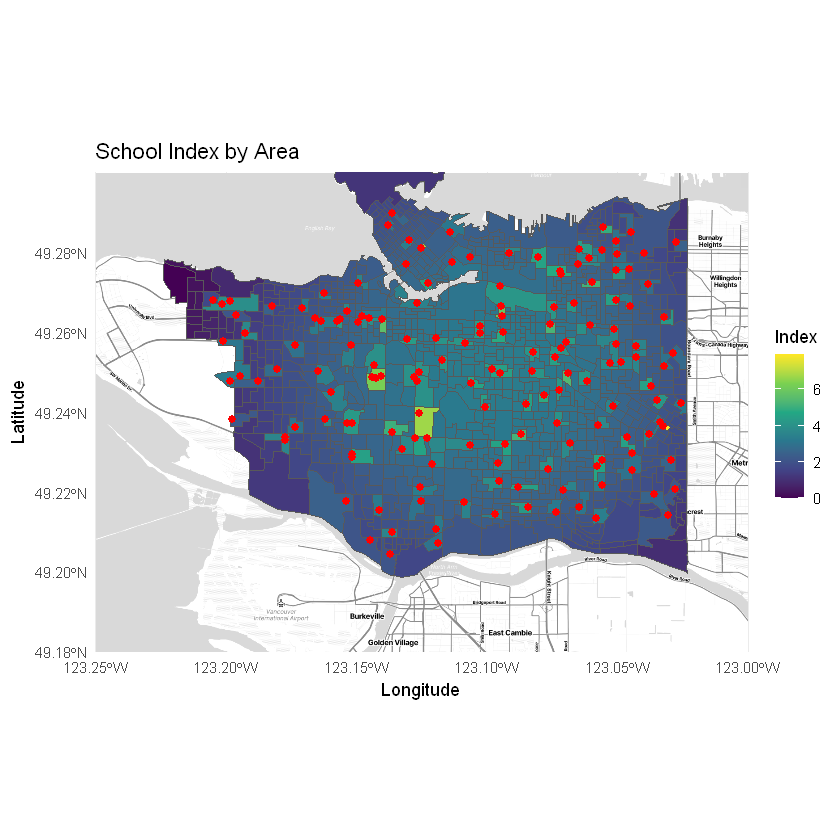

In [ ]:
ggmap(map) +
  geom_sf(data = school_census_with_index, aes(fill = accessibility_index),inherit.aes = FALSE) +
  scale_fill_viridis_c() +
  coord_sf(crs = st_crs(4326)) +
  geom_sf(data = school_data$geometry, color = "#ff0000", size = 2, inherit.aes = FALSE) +
  theme_minimal() +
  labs(title = "School Index by Area", fill = "Index", x = "Longitude", y = "Latitude")

In [ ]:
light_data_st <- st_sf(light_data, geometry = light_data$geometry, crs = 4326)

In [ ]:
light_census_with_index <- compute_accessibility_index(
  local_areas = census_data_st,
  points_of_interest = light_data_st
)|>
  glimpse()

Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"
Warning message:
"st_centroid assumes attributes are constant over geometries"


Rows: 993
Columns: 19
$ name                  <chr> "59150307", "59150308", "59150309", "59150310", …
$ households            <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174…
$ dwellings             <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189…
$ population            <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 50…
$ region                <fct> Vancouver, Vancouver, Vancouver, Vancouver, Vanc…
$ area_sq_km            <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.0…
$ age                   <dbl> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 51…
$ income                <dbl> 255, 205, 270, 280, 180, 205, 405, 170, 335, 175…
$ avg_distance_km       <dbl> 7.535841, 7.253416, 6.976612, 7.089322, 6.790936…
$ area_km2              <dbl> 0.29829107, 0.10920474, 0.11154401, 0.10904415, …
$ poi_count             <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, …
$ geometry              <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MUL…
$ poi_density     

In [42]:
ggmap(map) +
  geom_sf(data = light_census_with_index, aes(fill = accessibility_index),inherit.aes = FALSE) +
  scale_fill_viridis_c() +
  coord_sf(crs = st_crs(4326)) +
  theme_minimal() +
  labs(title = "Light Index by Area", fill = "Index", x = "Longitude", y = "Latitude")

ERROR: Error in eval(expr, envir, enclos): object 'light_census_with_index' not found


In [ ]:
bus_stops <- st_read("./transit_data/Stops.shp")

local_areas <- st_read("./transit_data/local-area-boundary.geojson")

bus_census_with_index <- compute_accessibility_index(
  local_areas = census_data_st,
  points_of_interest = bus_stops
)|>
  glimpse()

Reading layer `Stops' from data source 
  `C:\Users\Kaiyan Zhang\Desktop\econ326\transit_data\Stops.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 8785 features and 10 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -123.4231 ymin: 49.00439 xmax: -122.3029 ymax: 49.47356
Geodetic CRS:  WGS 84
Reading layer `local-area-boundary' from data source 
  `C:\Users\Kaiyan Zhang\Desktop\econ326\transit_data\local-area-boundary.geojson' 
  using driver `GeoJSON'
Simple feature collection with 22 features and 2 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -123.2248 ymin: 49.19894 xmax: -123.0232 ymax: 49.29581
Geodetic CRS:  WGS 84


Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"
Warning message:
"st_centroid assumes attributes are constant over geometries"


Rows: 993
Columns: 19
$ name                  <chr> "59150307", "59150308", "59150309", "59150310", …
$ households            <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174…
$ dwellings             <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189…
$ population            <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 50…
$ region                <fct> Vancouver, Vancouver, Vancouver, Vancouver, Vanc…
$ area_sq_km            <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.0…
$ age                   <dbl> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 51…
$ income                <dbl> 255, 205, 270, 280, 180, 205, 405, 170, 335, 175…
$ avg_distance_km       <dbl> 7.549866, 7.286136, 7.014300, 7.132412, 6.844344…
$ area_km2              <dbl> 0.29829107, 0.10920474, 0.11154401, 0.10904415, …
$ poi_count             <dbl> 2, 1, 2, 9, 1, 2, 3, 2, 6, 1, 1, 1, 2, 1, 1, 0, …
$ geometry              <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MUL…
$ poi_density     

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


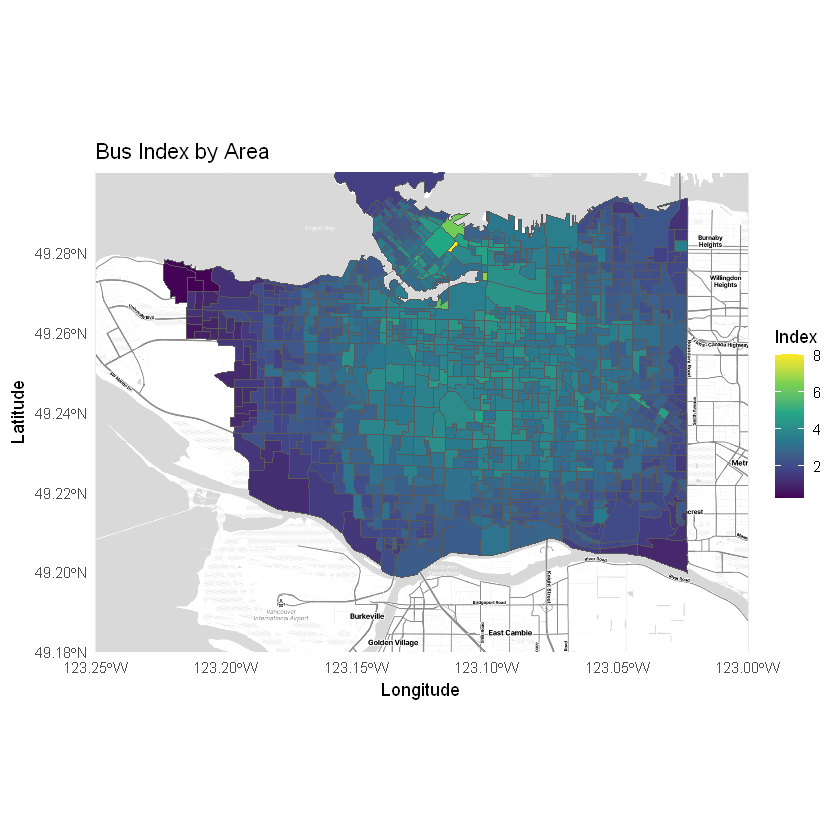

In [ ]:
ggmap(map) +
  geom_sf(data = bus_census_with_index, aes(fill = accessibility_index),inherit.aes = FALSE) +
  scale_fill_viridis_c() +
  coord_sf(crs = st_crs(4326)) +
  theme_minimal() +
  labs(title = "Bus Index by Area", fill = "Index", x = "Longitude", y = "Latitude")

In [ ]:
crime_in_census_divisions <- st_join(intentional_crime_sf, census_data_st, left = FALSE)

crime_counts <- crime_in_census_divisions %>%
  group_by(name) %>% 
  summarise(crime_count = n())|>
  st_drop_geometry()|>
  glimpse()

Rows: 993
Columns: 2
$ name        <chr> "59150307", "59150308", "59150309", "59150310", "59150311"…
$ crime_count <int> 28, 16, 31, 24, 14, 13, 20, 15, 23, 12, 15, 12, 8, 8, 8, 1…


In [ ]:
census_data_with_crime <- census_data_st %>%
  left_join(crime_counts, by = "name") %>%
  mutate(crime_count = ifelse(is.na(crime_count), 0, crime_count))

census_data_with_crime <- census_data_with_crime %>%
  mutate(crime_rate = crime_count / population * 10000)|>
  glimpse()

Rows: 993
Columns: 11
$ name        <chr> "59150307", "59150308", "59150309", "59150310", "59150311"…
$ households  <int> 254, 203, 269, 283, 181, 203, 402, 170, 333, 174, 275, 246…
$ dwellings   <int> 273, 223, 299, 310, 199, 211, 418, 181, 356, 189, 307, 264…
$ population  <dbl> 632, 501, 745, 536, 532, 562, 1088, 556, 959, 506, 782, 68…
$ region      <fct> Vancouver, Vancouver, Vancouver, Vancouver, Vancouver, Van…
$ area_sq_km  <dbl> 0.29926, 0.10956, 0.11190, 0.10940, 0.08094, 0.08706, 0.17…
$ age         <dbl> 630, 500, 745, 540, 530, 560, 1085, 555, 960, 510, 785, 68…
$ income      <dbl> 255, 205, 270, 280, 180, 205, 405, 170, 335, 175, 275, 250…
$ crime_count <int> 28, 16, 31, 24, 14, 13, 20, 15, 23, 12, 15, 12, 8, 8, 8, 1…
$ geometry    <MULTIPOLYGON [°]> MULTIPOLYGON (((-123.0233 4..., MULTIPOLYGON …
$ crime_rate  <dbl> 443.0380, 319.3613, 416.1074, 447.7612, 263.1579, 231.3167…


Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


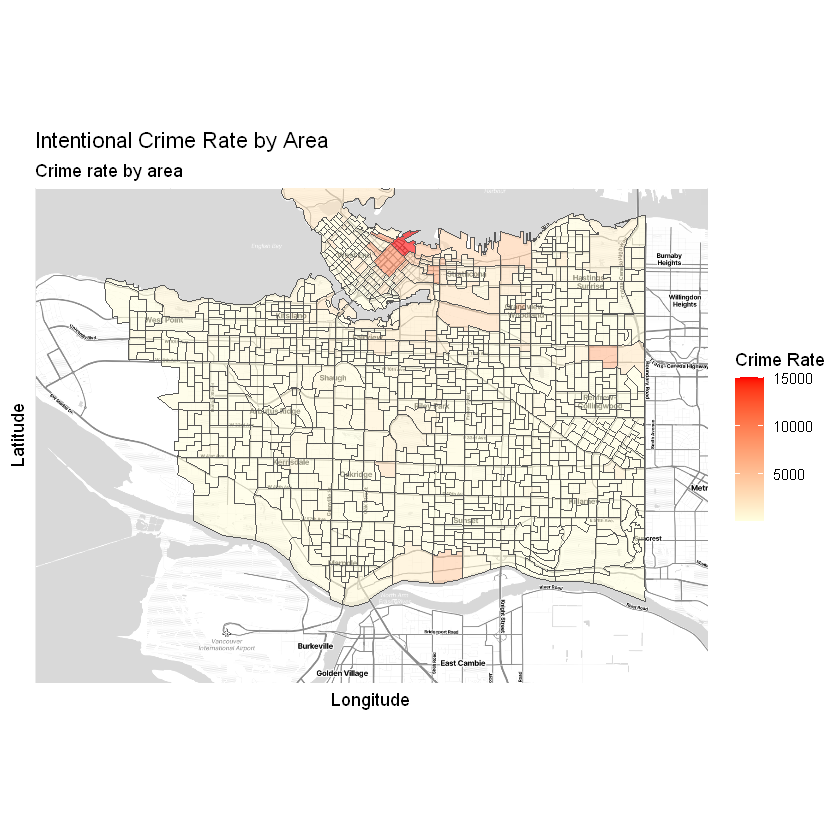

In [ ]:
ggmap(map) +
  geom_sf(data = census_data_with_crime, aes(fill = crime_rate), inherit.aes = FALSE, alpha = 0.6) +
  scale_fill_gradient(low = "lightyellow", high = "red", name = "Crime Rate") +
  labs(title = "Intentional Crime Rate by Area",
       subtitle = "Crime rate by area",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme(axis.text = element_blank(),
        axis.ticks = element_blank())